In [366]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [367]:
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,0,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,1,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,2,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,0,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,3,20,2.8,3.7,1.5,0.2,10.9


In [294]:
df['Fouls'] = df['PF']
df = df.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,0,0,0,0,0,1,0,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,0,1,0,0,0,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,0,0,0,0,0,1,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,0,0,0,0,0,1,0,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0


In [295]:
df1['C'] = df1['C'] + df1['C-PF']
df1['PG'] = df1['PG'] + df1['PG-SG']
df1['SF'] = df1['SF'] + df1['SF-PF']
df1['SG'] = df1['SG'] + df1['SG-PG']
df1 = df1.drop(['C-PF','PG-SG','SF-PF','SG-PG'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [368]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,0,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,1,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,2,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,0,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,3,20,2.8,3.7,1.5,0.2,10.9


In [369]:
#df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,...,3.2,-5.93,1990,0,22,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,...,14.6,0.74,1996,1,24,5.6,0.6,0.4,0.2,6.3
James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,...,2.9,-7.38,1998,2,22,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,...,5.2,-7.20,2000,0,23,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,...,15.8,11.13,2002,3,20,2.8,3.7,1.5,0.2,10.9


In [298]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,...,0,0,0,1,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,...,0,1,0,0,0,5.6,0.6,0.4,0.2,6.3
James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,...,0,0,0,0,1,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,...,0,0,0,1,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,...,0,0,1,0,0,2.8,3.7,1.5,0.2,10.9


In [299]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['C', 'PF', 'PG', 'SF', 'SG']
for du in dum:
    cols.remove(du)

In [370]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,School,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-1.408189,-0.955850,-2.020703,-3.646145,-2.497687,-2.461782,-0.151070,-1.970182,-2.108545,-0.023784,...,-2.417482,-3.148657,-4.043723,-1.456159,-0.107123,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,-1.385816,0.910467,1.444038,0.807100,0.681855,0.003288,1.686033,1.392592,0.987808,1.351905,...,0.527563,-1.420564,-2.905646,-0.696042,0.990730,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-1.363444,-2.081130,-1.991341,-2.705589,-2.724797,-2.635379,-0.561297,-2.048386,-2.108545,-0.818195,...,-2.494983,-3.524330,-2.526287,0.064075,-0.107123,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,-1.341072,0.526225,0.122738,0.883880,-1.967763,-1.559081,-1.916829,-1.500958,-1.217813,-2.097005,...,-1.900807,-3.477695,-2.146927,-1.456159,0.441803,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,-1.318699,-0.681392,-1.110475,0.480784,0.908965,0.940708,-0.115398,0.532347,0.521234,0.228103,...,0.837567,1.271324,-1.767568,0.824191,-1.204976,0.300651,2.019853,2.833971,-0.163927,1.563782


In [387]:
train=df1[0:(round(len(df1)*.8))] 
test=df1[(round(len(df1)*.8 - 1)):]
trains = np.split(train, [29], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [29], axis=1)
test_x=tests[0]
test_y=tests[1]

In [388]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [389]:
train_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Mike Higgins,-1.106403,-0.666715,-0.712588,-0.163927,-0.958903
Ashraf Amaya,1.942213,-0.429665,-0.166964,-0.163927,0.354995
James Cotton,-0.930521,-0.903765,-0.985400,-0.501126,-0.591011
Eddie Robinson,0.242023,-0.508681,0.651473,0.510471,0.538941
Gilbert Arenas,0.300651,2.019853,2.833971,-0.163927,1.563782


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


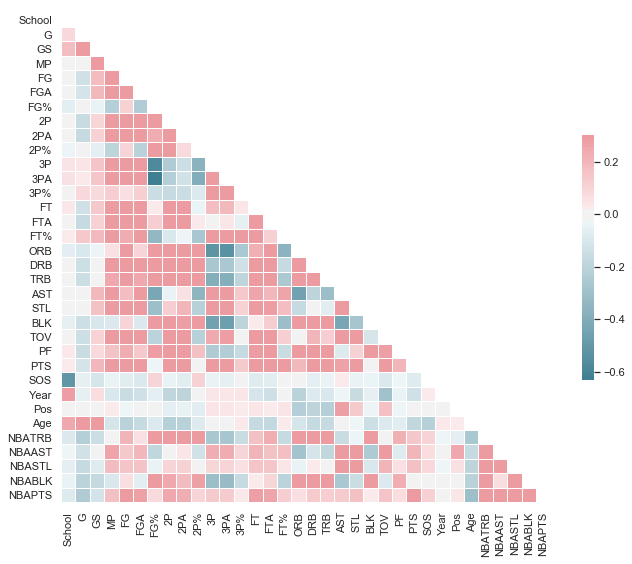

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df1

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [391]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 12)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[False False False  True  True  True False  True  True  True  True  True
 False  True False False False False False  True False False False False
  True False False False  True]
[11  4 16  1  1  1 17  1  1  1  1  1 13  1  7  8  9 14 18  1  2  5  3 12
  1  6 10 15  1]


In [392]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,29):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,MP,FG,FGA,2P,2PA,2P%,3P,3PA,FT,AST,PTS,Age
Name,,,,,,,,,,,,
Mike Higgins,-3.646145,-2.497687,-2.461782,-1.970182,-2.108545,-0.023784,-1.020939,-1.073928,-1.615731,-1.373415,-2.417482,-0.107123
Ashraf Amaya,0.807100,0.681855,0.003288,1.392592,0.987808,1.351905,-1.152194,-1.175226,0.875059,-1.107988,0.527563,0.990730
James Cotton,-2.705589,-2.724797,-2.635379,-2.048386,-2.108545,-0.818195,-1.283449,-1.327174,-1.186284,-1.240701,-2.494983,-0.107123
Eddie Robinson,0.883880,-1.967763,-1.559081,-1.500958,-1.217813,-2.097005,-0.889684,-0.820682,-1.186284,0.749999,-1.900807,0.441803
Gilbert Arenas,0.480784,0.908965,0.940708,0.532347,0.521234,0.228103,0.685375,0.749445,0.187945,-0.046281,0.837567,-1.204976


## Linear Regression

In [393]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-0.33056397, -0.53839719, -3.25519366,  0.2410265 ,  1.88799669,
       -0.10932995, -0.48032744,  2.0411402 , -0.48709069,  0.2256302 ,
        2.10196601, -0.298741  ])

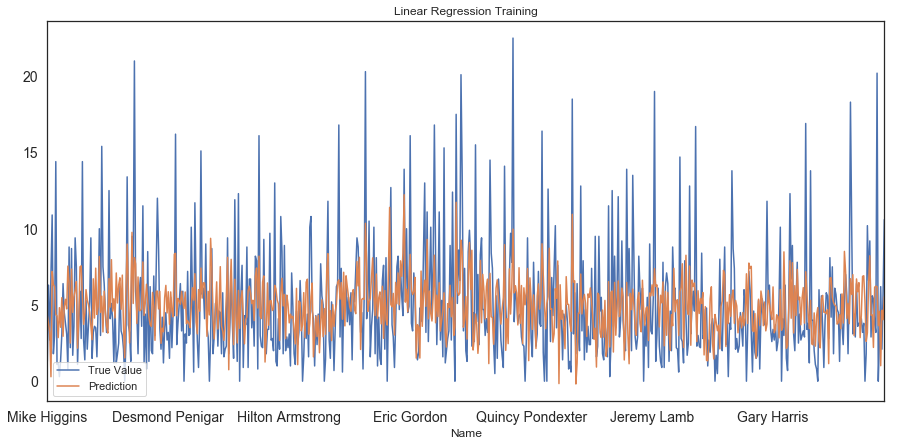

adj train r^2 = 0.20940677666414387
train mse = 11.191001061817769


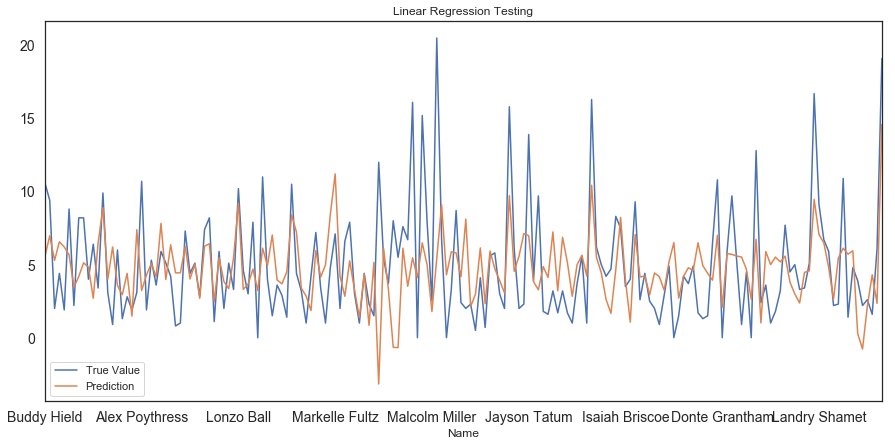

['MP', 'FG', 'FGA', '2P', '2PA', '2P%', '3P', '3PA', 'FT', 'AST', 'PTS', 'Age']
adj test r^2 = 0.15445193625849796
test mse = 12.365865462515512


In [394]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Extra Trees

In [395]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

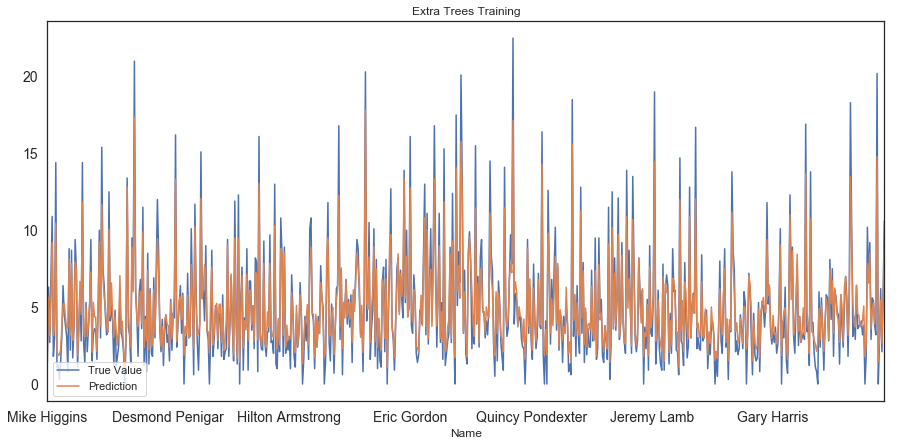

adj train r^2 = 0.8844647262677564
train mse = 1.6354243027272666


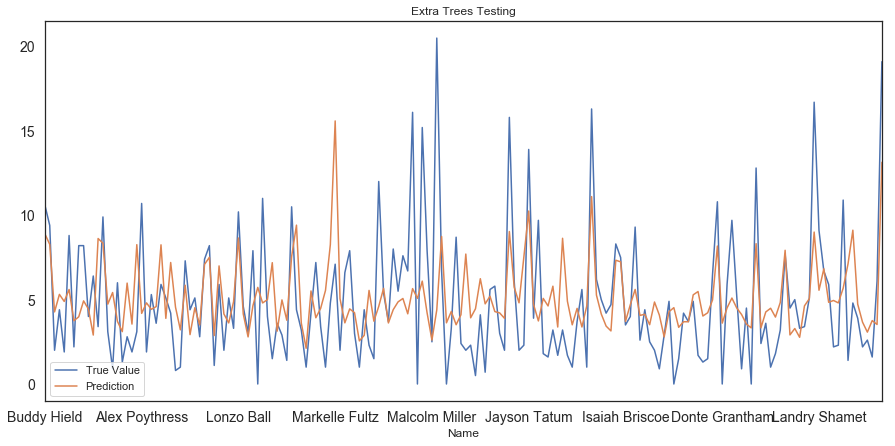

['MP', 'FG', 'FGA', '2P', '2PA', '2P%', '3P', '3PA', 'FT', 'AST', 'PTS', 'Age']
adj test r^2 = 0.21729854145256833
test mse = 11.446754299080466


In [396]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Random Forrest

In [397]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

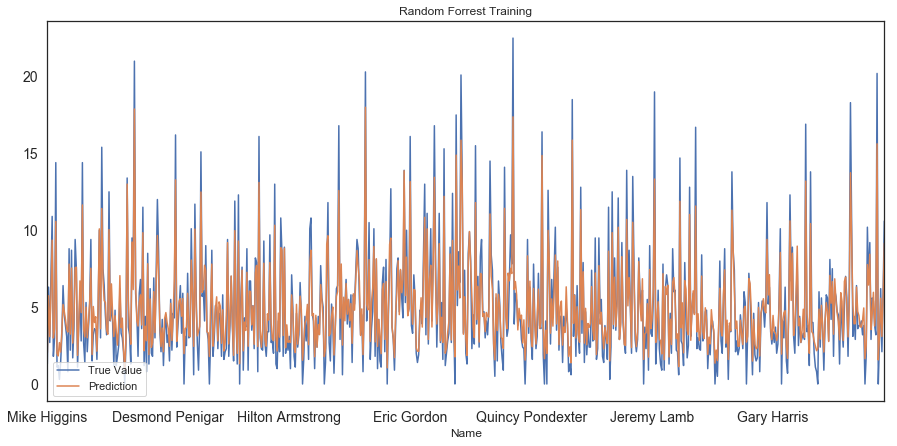

adj train r^2 = 0.882237211674213
train mse = 1.6669552056565595


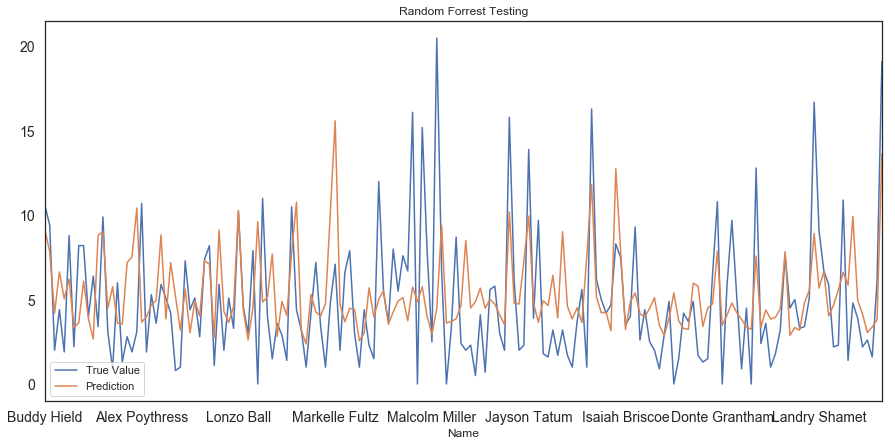

['MP', 'FG', 'FGA', '2P', '2PA', '2P%', '3P', '3PA', 'FT', 'AST', 'PTS', 'Age']
adj test r^2 = 0.12578766506900851
test mse = 12.785071107126447


In [398]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## XGBoost

In [399]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [400]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

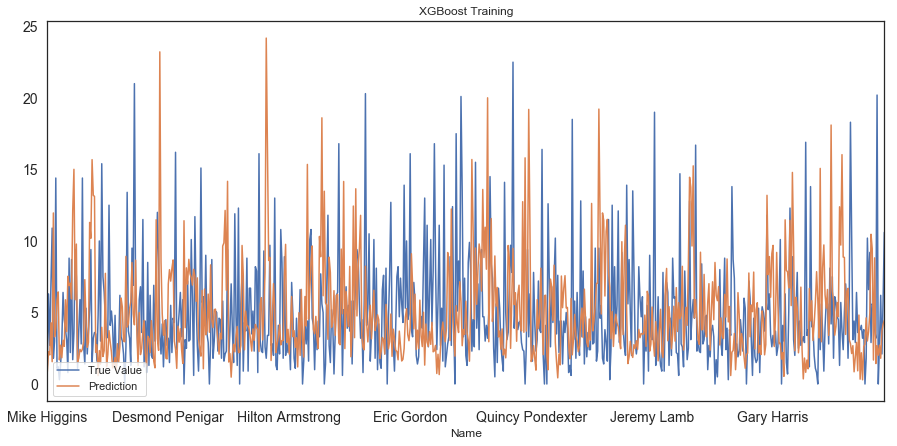

adj train r^2 = -0.9315619031246201
train mse = 27.34163495308828


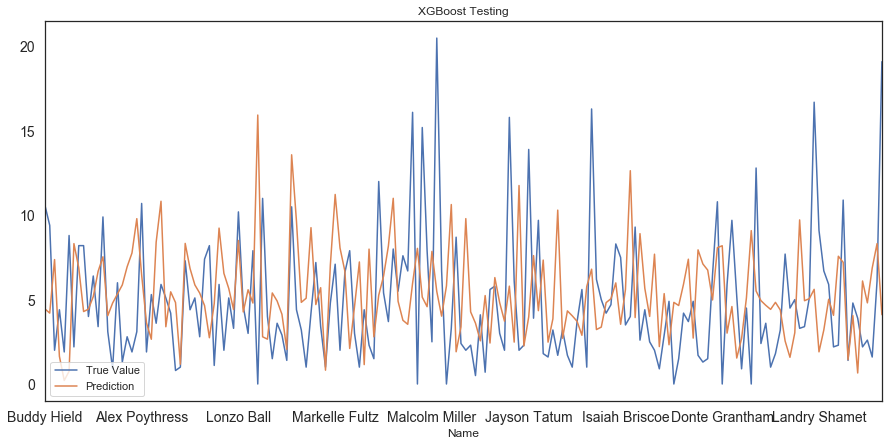

['MP', 'FG', 'FGA', '2P', '2PA', '2P%', '3P', '3PA', 'FT', 'AST', 'PTS', 'Age']
adj test r^2 = -0.559845236177902
test mse = 22.812229322091596


In [401]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## Feed Forward Neural Network

In [402]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [403]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=12, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 693 samples, validate on 174 samples
Epoch 1/500
693/693 [==============================] - 2s 2ms/step - loss: 15.6682 - val_loss: 13.4879
Epoch 2/500
693/693 [==============================] - 0s 116us/step - loss: 11.9090 - val_loss: 10.1611
Epoch 3/500
693/693 [==============================] - 0s 105us/step - loss: 8.9871 - val_loss: 7.6538
Epoch 4/500
693/693 [==============================] - 0s 108us/step - loss: 6.7623 - val_loss: 5.7863
Epoch 5/500
693/693 [==============================] - 0s 203us/step - loss: 5.1139 - val_loss: 4.4016
Epoch 6/500
693/693 [==============================] - 0s 146us/step - loss: 3.9306 - val_loss: 3.4061
Epoch 7/500
693/693 [==============================] - 0s 110us/step - loss: 3.0769 - val_loss: 2.6808
Epoch 8/500
693/693 [==============================] - 0s 105us/step - loss: 2.4561 - val_loss: 2.1715
Epoch 9/500
693/693 [==============================] - 0s 106us/step - loss: 2.0270 - val_loss: 1.8134
Epoch 10/500
693/693 [===

693/693 [==============================] - 0s 109us/step - loss: 0.8819 - val_loss: 0.8451
Epoch 80/500
693/693 [==============================] - 0s 102us/step - loss: 0.8800 - val_loss: 0.8452
Epoch 81/500
693/693 [==============================] - 0s 99us/step - loss: 0.8780 - val_loss: 0.8435
Epoch 82/500
693/693 [==============================] - 0s 99us/step - loss: 0.8828 - val_loss: 0.8438
Epoch 83/500
693/693 [==============================] - 0s 100us/step - loss: 0.8773 - val_loss: 0.8435
Epoch 84/500
693/693 [==============================] - 0s 102us/step - loss: 0.8791 - val_loss: 0.8408
Epoch 85/500
693/693 [==============================] - 0s 99us/step - loss: 0.8900 - val_loss: 0.8441
Epoch 86/500
693/693 [==============================] - 0s 98us/step - loss: 0.8861 - val_loss: 0.8486
Epoch 87/500
693/693 [==============================] - 0s 98us/step - loss: 0.8817 - val_loss: 0.8411
Epoch 88/500
693/693 [==============================] - 0s 103us/step - loss: 0.87

693/693 [==============================] - 0s 99us/step - loss: 0.8628 - val_loss: 0.8332
Epoch 158/500
693/693 [==============================] - 0s 102us/step - loss: 0.8562 - val_loss: 0.8322
Epoch 159/500
693/693 [==============================] - 0s 173us/step - loss: 0.8543 - val_loss: 0.8319
Epoch 160/500
693/693 [==============================] - 0s 149us/step - loss: 0.8583 - val_loss: 0.8345
Epoch 161/500
693/693 [==============================] - 0s 100us/step - loss: 0.8544 - val_loss: 0.8368
Epoch 162/500
693/693 [==============================] - 0s 100us/step - loss: 0.8609 - val_loss: 0.8321
Epoch 163/500
693/693 [==============================] - 0s 98us/step - loss: 0.8625 - val_loss: 0.8395
Epoch 164/500
693/693 [==============================] - 0s 101us/step - loss: 0.8719 - val_loss: 0.8324
Epoch 165/500
693/693 [==============================] - 0s 100us/step - loss: 0.8716 - val_loss: 0.8331
Epoch 166/500
693/693 [==============================] - 0s 98us/step -

693/693 [==============================] - 0s 102us/step - loss: 0.8452 - val_loss: 0.8293
Epoch 236/500
693/693 [==============================] - 0s 104us/step - loss: 0.8441 - val_loss: 0.8333
Epoch 237/500
693/693 [==============================] - 0s 98us/step - loss: 0.8554 - val_loss: 0.8286
Epoch 238/500
693/693 [==============================] - 0s 99us/step - loss: 0.8477 - val_loss: 0.8274
Epoch 239/500
693/693 [==============================] - 0s 99us/step - loss: 0.8515 - val_loss: 0.8331
Epoch 240/500
693/693 [==============================] - 0s 102us/step - loss: 0.8534 - val_loss: 0.8282
Epoch 241/500
693/693 [==============================] - 0s 100us/step - loss: 0.8507 - val_loss: 0.8296
Epoch 242/500
693/693 [==============================] - 0s 98us/step - loss: 0.8476 - val_loss: 0.8307
Epoch 243/500
693/693 [==============================] - 0s 100us/step - loss: 0.8533 - val_loss: 0.8320
Epoch 244/500
693/693 [==============================] - 0s 99us/step - l

693/693 [==============================] - 0s 101us/step - loss: 0.8391 - val_loss: 0.8283
Epoch 314/500
693/693 [==============================] - 0s 99us/step - loss: 0.8418 - val_loss: 0.8306
Epoch 315/500
693/693 [==============================] - 0s 101us/step - loss: 0.8391 - val_loss: 0.8309
Epoch 316/500
693/693 [==============================] - 0s 101us/step - loss: 0.8410 - val_loss: 0.8349
Epoch 317/500
693/693 [==============================] - 0s 98us/step - loss: 0.8433 - val_loss: 0.8381
Epoch 318/500
693/693 [==============================] - 0s 100us/step - loss: 0.8623 - val_loss: 0.8348
Epoch 319/500
693/693 [==============================] - 0s 257us/step - loss: 0.8490 - val_loss: 0.8307
Epoch 320/500
693/693 [==============================] - 0s 99us/step - loss: 0.8504 - val_loss: 0.8291
Epoch 321/500
693/693 [==============================] - 0s 98us/step - loss: 0.8429 - val_loss: 0.8306
Epoch 322/500
693/693 [==============================] - 0s 105us/step - 

693/693 [==============================] - 0s 100us/step - loss: 0.8415 - val_loss: 0.8267
Epoch 392/500
693/693 [==============================] - 0s 102us/step - loss: 0.8500 - val_loss: 0.8236
Epoch 393/500
693/693 [==============================] - 0s 99us/step - loss: 0.8447 - val_loss: 0.8266
Epoch 394/500
693/693 [==============================] - 0s 99us/step - loss: 0.8537 - val_loss: 0.8225
Epoch 395/500
693/693 [==============================] - 0s 101us/step - loss: 0.8360 - val_loss: 0.8263
Epoch 396/500
693/693 [==============================] - 0s 102us/step - loss: 0.8340 - val_loss: 0.8268
Epoch 397/500
693/693 [==============================] - 0s 97us/step - loss: 0.8340 - val_loss: 0.8270
Epoch 398/500
693/693 [==============================] - 0s 98us/step - loss: 0.8394 - val_loss: 0.8254
Epoch 399/500
693/693 [==============================] - 0s 108us/step - loss: 0.8388 - val_loss: 0.8246
Epoch 400/500
693/693 [==============================] - 0s 102us/step - 

693/693 [==============================] - 0s 103us/step - loss: 0.8162 - val_loss: 0.8257
Epoch 470/500
693/693 [==============================] - 0s 100us/step - loss: 0.8254 - val_loss: 0.8261
Epoch 471/500
693/693 [==============================] - 0s 98us/step - loss: 0.8220 - val_loss: 0.8218
Epoch 472/500
693/693 [==============================] - 0s 100us/step - loss: 0.8209 - val_loss: 0.8272
Epoch 473/500
693/693 [==============================] - 0s 101us/step - loss: 0.8325 - val_loss: 0.8219
Epoch 474/500
693/693 [==============================] - 0s 99us/step - loss: 0.8207 - val_loss: 0.8247
Epoch 475/500
693/693 [==============================] - 0s 98us/step - loss: 0.8247 - val_loss: 0.8243
Epoch 476/500
693/693 [==============================] - 0s 99us/step - loss: 0.8252 - val_loss: 0.8211
Epoch 477/500
693/693 [==============================] - 0s 242us/step - loss: 0.8237 - val_loss: 0.8226
Epoch 478/500
693/693 [==============================] - 0s 99us/step - l

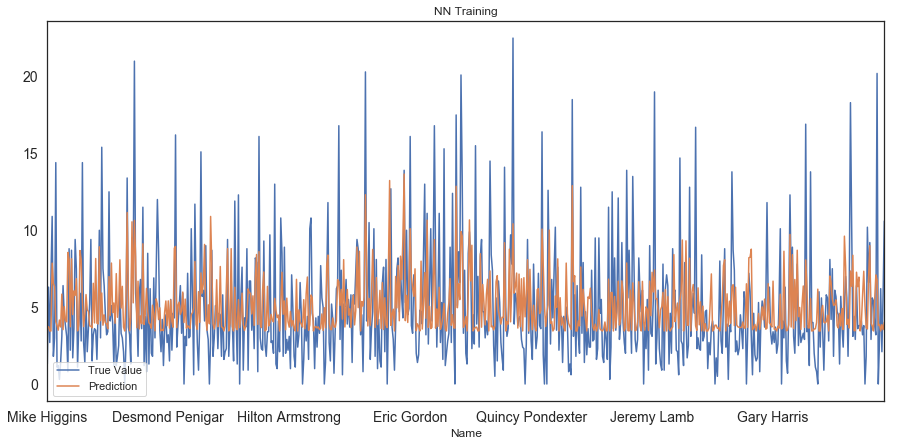

adj train r^2 = 0.24323770644634335
train mse = 10.712117661429652


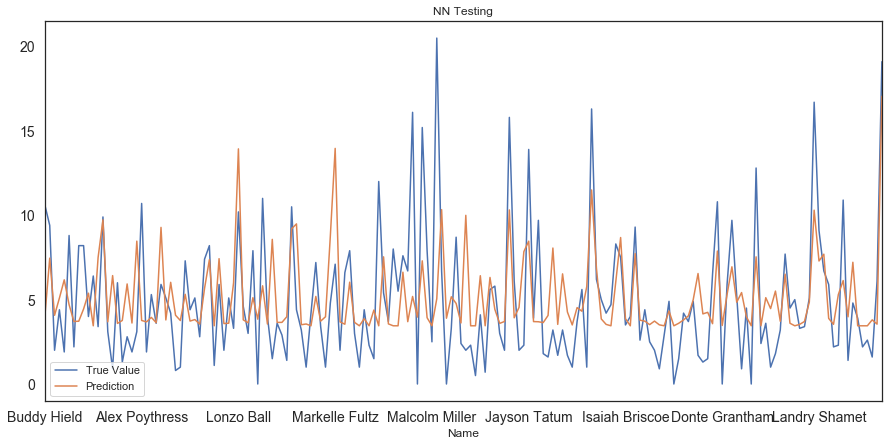

adj test r^2 = 0.25434606742565946
test mse = 10.904946279468758


In [404]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## LSTM

In [405]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [406]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 693 samples, validate on 174 samples
Epoch 1/40
693/693 [==============================] - 9s 13ms/step - loss: 0.8967 - val_loss: 0.9160
Epoch 2/40
693/693 [==============================] - 4s 6ms/step - loss: 0.7840 - val_loss: 1.0549
Epoch 3/40
693/693 [==============================] - 4s 6ms/step - loss: 0.7646 - val_loss: 0.8761
Epoch 4/40
693/693 [==============================] - 4s 6ms/step - loss: 0.6912 - val_loss: 0.9447
Epoch 5/40
693/693 [==============================] - 4s 6ms/step - loss: 0.6688 - val_loss: 0.9687
Epoch 6/40
693/693 [==============================] - 5s 7ms/step - loss: 0.6494 - val_loss: 0.9882
Epoch 7/40
693/693 [==============================] - 4s 6ms/step - loss: 0.6308 - val_loss: 1.1436
Epoch 8/40
693/693 [==============================] - 5s 7ms/step - loss: 0.6258 - val_loss: 1.0972
Epoch 9/40
693/693 [==============================] - 5s 7ms/step - loss: 0.6005 - val_loss: 1.1686
Epoch 10/40
693/693 [==============================] 

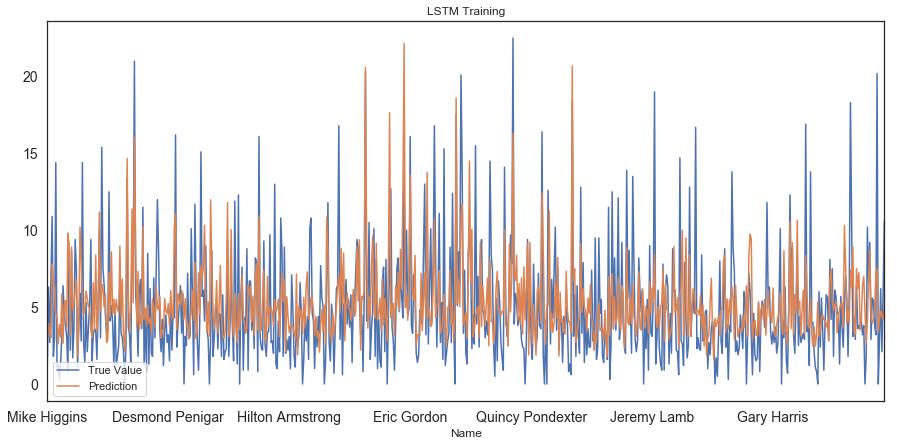

adj train r^2 = 0.28571988820796745
train mse = 10.110774104250304


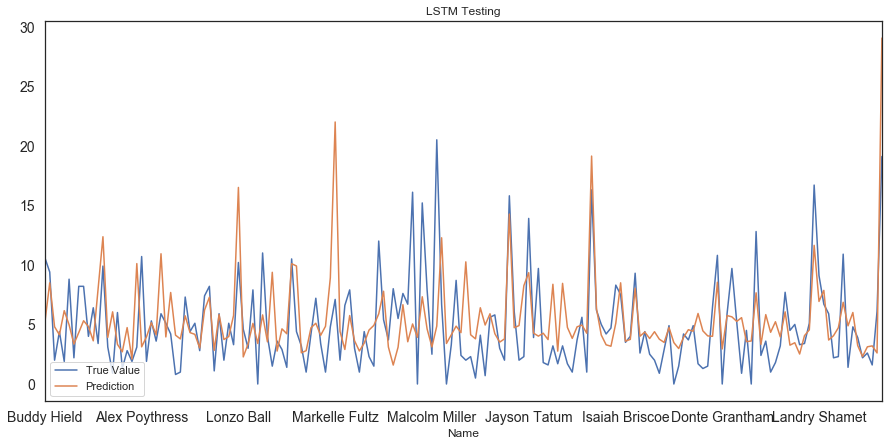

adj test r^2 = 0.13248506693673834
test mse = 12.687123782785974


In [407]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

## TPOT

In [408]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


0.5030238 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(VarianceThreshold(DecisionTreeRegressor(ElasticNetCV(input_matrix, l1_ratio=0.4, tol=1e-05), max_depth=3, min_samples_leaf=17, min_samples_split=9), threshold=0.2), l1_ratio=0.35000000000000003, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=0.5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

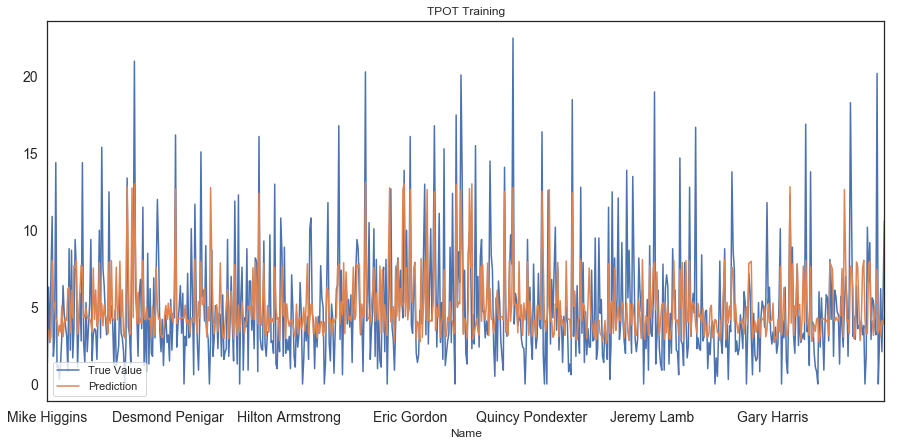

adj train r^2 = 0.313546340245089
train mse = 9.716885255848478


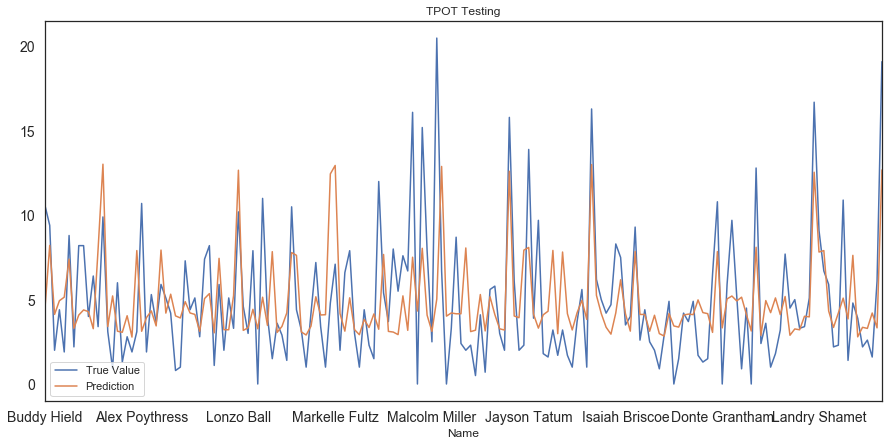

adj test r^2 = 0.2837150619576124
test mse = 10.47543428514822


In [409]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [410]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Jawun Evans,-0.285622,0.755586,0.924285,-0.501126,4.8,12.450622,-7.650622
Thomas Bryant,-0.696012,-0.587698,-0.985400,-0.501126,1.5,7.842759,-6.342759
Malik Monk,-0.754639,0.202469,-0.439776,-0.501126,6.7,12.892573,-6.192573
Justin Patton,-1.340912,-0.903765,1.469910,-0.838324,2.0,8.061460,-6.061460
Markelle Fultz,0.476532,2.098870,1.197098,0.173272,7.1,12.950879,-5.850879


In [411]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.828296,2.019853,2.833971,0.173272,20.5,5.034151,15.465849
Andre Ingram,0.417905,1.861820,2.833971,4.219657,12.0,3.245723,8.754277
Kyle Kuzma,2.352604,0.518536,0.378661,0.510471,16.1,7.512664,8.587336
Alex Poythress,1.473195,-0.271631,0.105849,0.173272,10.7,3.124571,7.575429
Lauri Markkanen,3.056131,0.044435,0.378661,1.184868,15.2,8.040996,7.159004
